In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn')
# plt.style.use('fivethirtyeight')

In [2]:
DTYPE = np.float32
FIGSIZE = (20, 5)
slice_size = (2301, 751)

## References

* (Sirgue et al., 2008): **3D Frequency Domain Waveform Inversion Using Time Domain Finite Difference MethodsNormal access**, L. Sirgue, J. T. Etgen and U. Albertin, 70th EAGE Conference and Exhibition incorporating SPE EUROPEC 2008

## Wavelets

According to (Sirgue et al., 2008), the source term $s_{DFT}(t)$ at time $t$ used at each time step is given by the inverse discrete Fourier transform (DFT) of the frequency domain (FD) source term:

$$s_{DFT}(t) = e^{-2\pi f t} S(f)$$

where $S(f)$ is the Fourier transform of a time-domain Ricker wavelet.

In [4]:
# Load the wavelets
ricker = np.fromfile('user_defined_ricker_20hz.bin', dtype=DTYPE )
# ricker_dft_3hz = np.fromfile('user_dft_3hz.bin', dtype=DTYPE )
# ricker_dft_10hz = np.fromfile('user_dft_10hz.bin', dtype=DTYPE )

In [3]:
# Time axis
time_step_in_seconds = 4e-4
start_time_in_seconds = 0.0
end_time_in_seconds = 2.0
t = np.arange(start_time_in_seconds, end_time_in_seconds, time_step_in_seconds)

dt = time_step_in_seconds
# dt = np.mean(np.diff(t))
print(f'dt is {dt}')

dt is 0.0004


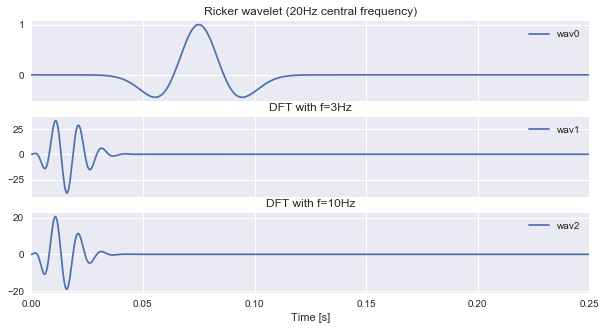

In [42]:
# Plot the wavelets
FIGSIZE = (10, 5)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=FIGSIZE, sharex=True, sharey=False)

_ = axes[0].plot(t, ricker, label='wav0')
_ = axes[0].set_title('Ricker wavelet (20Hz central frequency)')
_ = axes[0].legend()

_ = axes[1].plot(t, ricker_dft_3hz, label='wav1')
_ = axes[1].set_title('DFT with f=3Hz')
_ = axes[1].legend()

_ = axes[2].plot(t, ricker_dft_10hz, label='wav2')
_ = axes[2].set_title('DFT with f=10Hz')
_ = axes[2].legend()

_ = axes[2].set_xlim(0, 0.25)
_ = axes[2].set_xlabel('Time [s]')

In [5]:
# FFT of Ricker wavelet
Ricker = np.fft.fft(ricker)

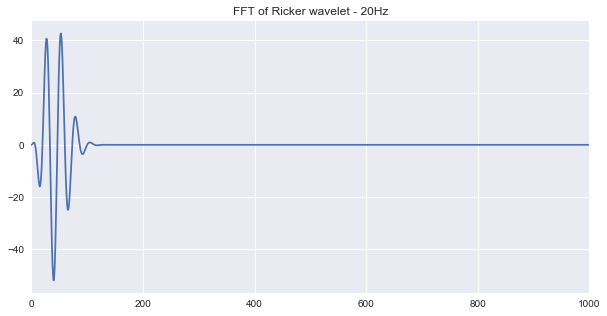

In [39]:
# Plot the wavelets
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=FIGSIZE, sharex=True, sharey=False)

_ = ax.plot(np.real(Ricker))
_ = ax.set_xlim(0, 1000)
_ = ax.set_title('FFT of Ricker wavelet - 20Hz')

### Monochromatic source wavelet

In [245]:
freq = 10
sin10 = np.sin(2 * np.pi * t * freq)

(0, 1.0)

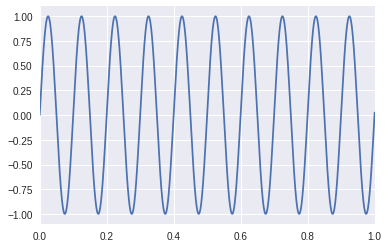

In [247]:
plt.plot(t, sin10)
plt.xlim(0, 1.0)

In [248]:
Nfft = sin10.size
Sin10 = np.fft.fft(sin10, Nfft)

In [249]:
Sin10[0]

(-3.747710192478749e-14+0j)

In [15]:
1/ (dt * ricker.size)

0.5

In [16]:
1/2/dt

1250.0

In [7]:
fs = 1/dt
# Frequency resolution (sampling)
df = fs/Nfft
print(f'fs is {fs} and df is {df}')
print(f'{freq}Hz will have a spike at the {freq/df}th sample')

fs is 2500.0 and df is 0.5
10Hz will have a spike at the 20.0th sample


In [17]:
# Frequency axis
f = np.arange(Nfft) * df
f2 = np.arange(0, 1, 1/Nfft) * fs

In [23]:
fs/2

1250.0

(5, 15)

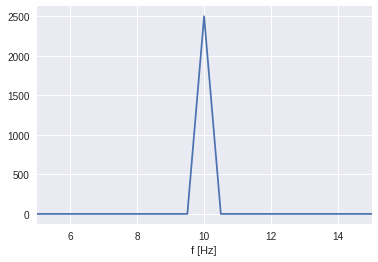

In [257]:
plt.plot(f, np.absolute(Sin10))
# plt.plot(f, Sin10.real)
# plt.plot(f, Sin10.imag)
plt.xlabel('f [Hz]')
plt.xlim(5, 15)

### Ricker wavelet

In [8]:
Nfft = ricker.size
freq_ricker = 20
freq = 10
Ricker = np.fft.fft(ricker, Nfft)
print(f'{freq}Hz will have a spike at the {freq/df}th sample')

10Hz will have a spike at the 20.0th sample


(0, 60)

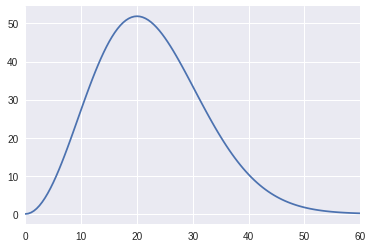

In [19]:
plt.plot(f2, np.absolute(Ricker))
# plt.plot(f, Ricker.real)
# plt.plot(f, Ricker.imag)
plt.xlim(0, 60)
# plt.xlim(4940, 5000)

In [414]:
Ricker_mono = np.zeros_like(Ricker)

In [415]:
Ricker_mono[20] = Ricker[20]
Ricker_mono[4980] = Ricker[4980]

(0, 60)

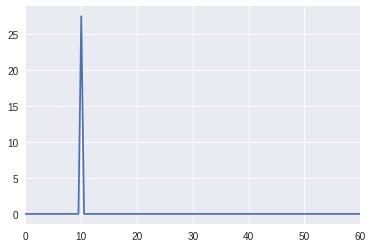

In [416]:
plt.plot(f, np.absolute(Ricker_mono))
# plt.plot(f, Ricker.real)
# plt.plot(f, Ricker.imag)
plt.xlim(0, 60)
# plt.xlim(2450, 2500)

In [417]:
ricker_mono = np.fft.ifft(Ricker_mono).real

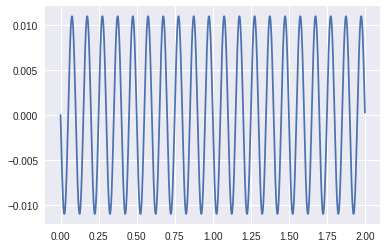

In [418]:
plt.plot(t, ricker_mono)

In [419]:
filename = f'user_defined_ricker_{freq_ricker}hz_filtered_{freq}hz.bin'
fmt = np.float32
ricker_mono.astype(fmt).tofile(filename)

## DFTs

In [3]:
# dft_3 = np.fromfile('dft_3hz.bin', dtype=DTYPE).reshape(slice_size)
# dft_10 = np.fromfile('dft_10hz.bin', dtype=DTYPE).reshape(slice_size)
# dft_ricker_5 = np.fromfile('dft_ricker_5hz.bin', dtype=np.complex64).reshape(slice_size)
# dft_ricker_10 = np.fromfile('dft_ricker_10hz.bin', dtype=np.complex64).reshape(slice_size)
dft_ricker_10 = np.fromfile('dft_ricker_10hz.bin', dtype=np.complex64).reshape(slice_size)
dft_ricker_10_filtered_10 = np.fromfile('dft_ricker_10hz_filtered_10hz.bin', dtype=np.complex64).reshape(slice_size)
dft_ricker_20 = np.fromfile('dft_ricker_20hz.bin', dtype=np.complex64).reshape(slice_size)
dft_ricker_20_filtered_10 = np.fromfile('dft_ricker_20hz_filtered_10hz.bin', dtype=np.complex64).reshape(slice_size)
# dft_sine_10 = np.fromfile('dft_sine_10hz.bin', dtype=np.complex64).reshape(slice_size)

In [4]:
dft0 = dft_ricker_10
dft1 = dft_ricker_10_filtered_10
dft2 = dft_ricker_20
dft3 = dft_ricker_20_filtered_10

In [5]:
print(dft0.real.max())
print(dft1.real.max())
print(dft2.real.max())
print(dft3.real.max())

4.3124305e-07
4.3853078e-07
4.4692024e-06
4.469322e-06


In [6]:
# dft0 /=dft0.max()
# dft1 /=dft1.max()

In [7]:
# dft_diff = dft0 - dft1

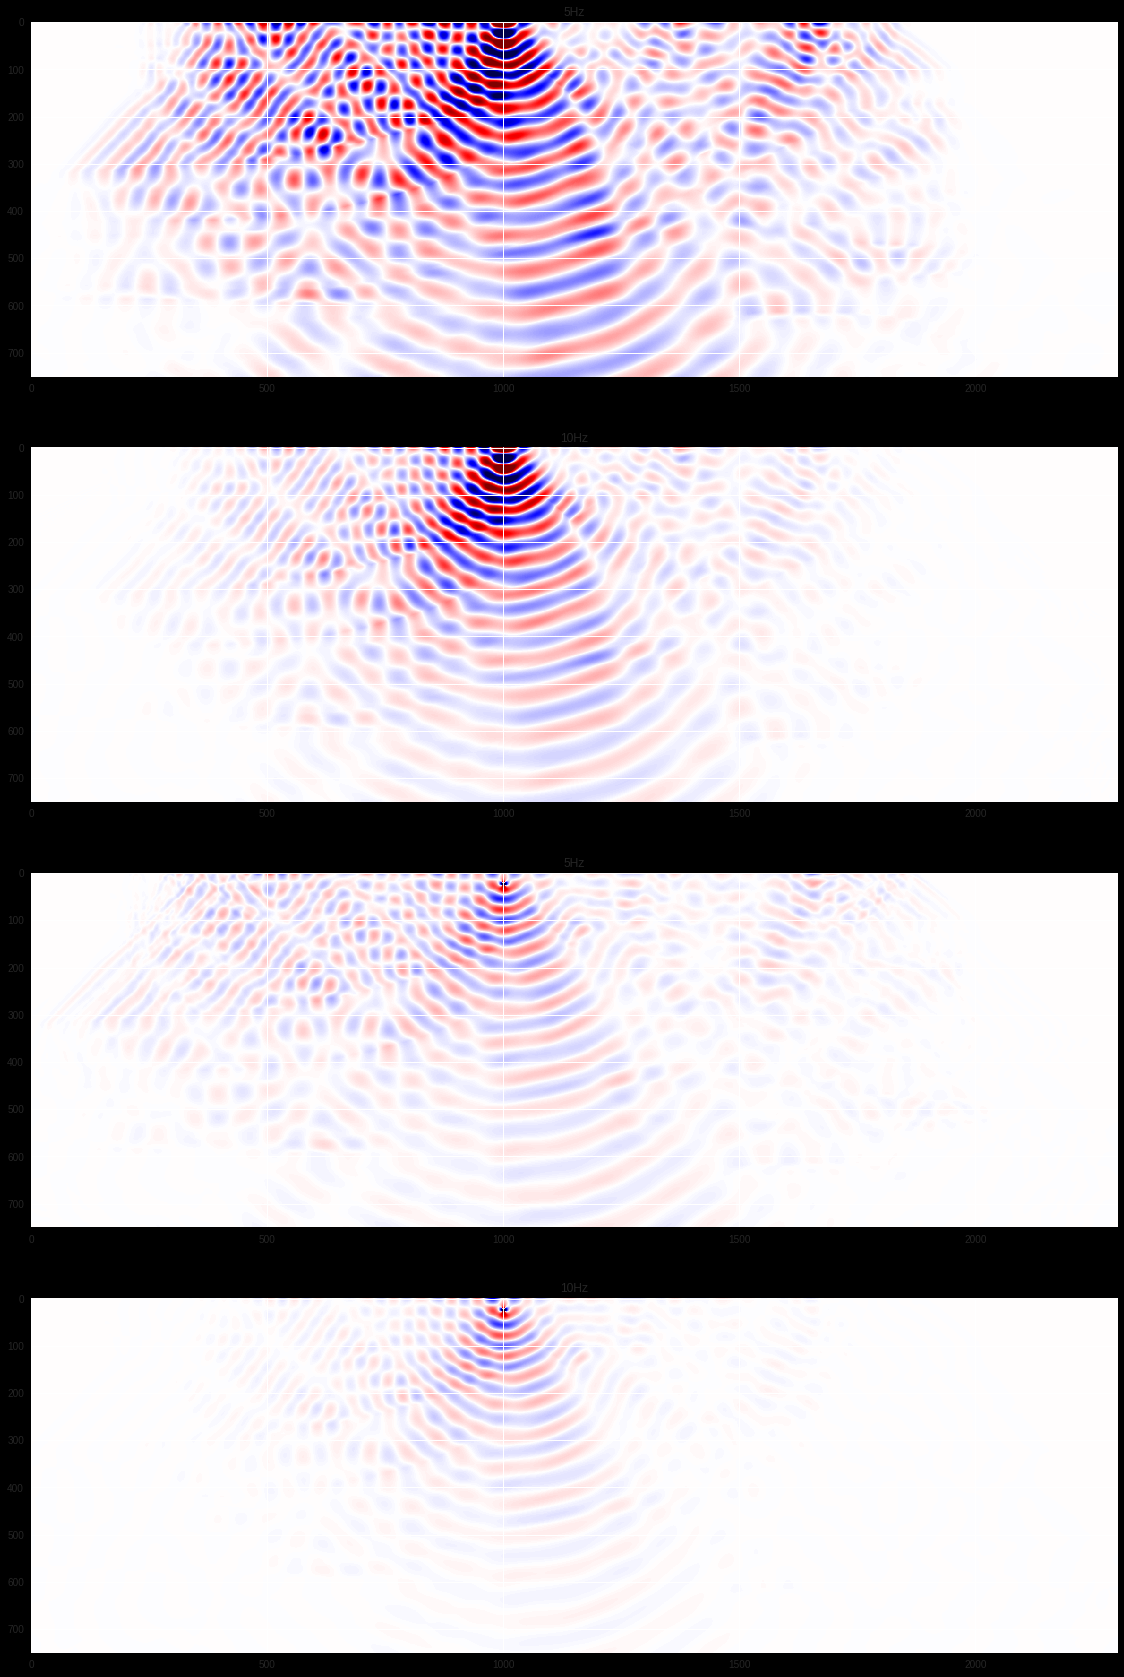

In [36]:
FIGSIZE = (20, 30)
fig, axes = plt.subplots(4, 1, figsize=FIGSIZE, sharex=False, sharey=False, facecolor='black')

clip=1e-7
vmin, vmax = -clip, clip

_ = axes[0].imshow(dft0.real.T, vmin=vmin, vmax=vmax, cmap=plt.cm.seismic)
_ = axes[0].set_title('5Hz')

clip=1e-7
vmin, vmax = -clip, clip

_ = axes[1].imshow(dft1.real.T, vmin=vmin, vmax=vmax, cmap=plt.cm.seismic)
_ = axes[1].set_title('10Hz')

clip=1e-7
vmin, vmax = -clip, clip

_ = axes[2].imshow(dft2.real.T, vmin=vmin, vmax=vmax, cmap=plt.cm.seismic)
_ = axes[2].set_title('5Hz')

clip=1e-7
vmin, vmax = -clip, clip

_ = axes[3].imshow(dft3.real.T, vmin=vmin, vmax=vmax, cmap=plt.cm.seismic)
_ = axes[3].set_title('10Hz')

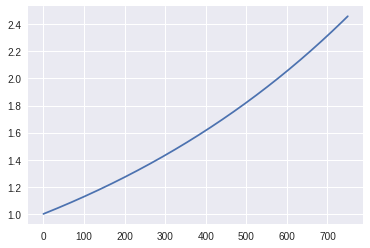

In [47]:
gain = np.exp(np.arange(751)*0.0012)
plt.plot(np.arange(751), gain)

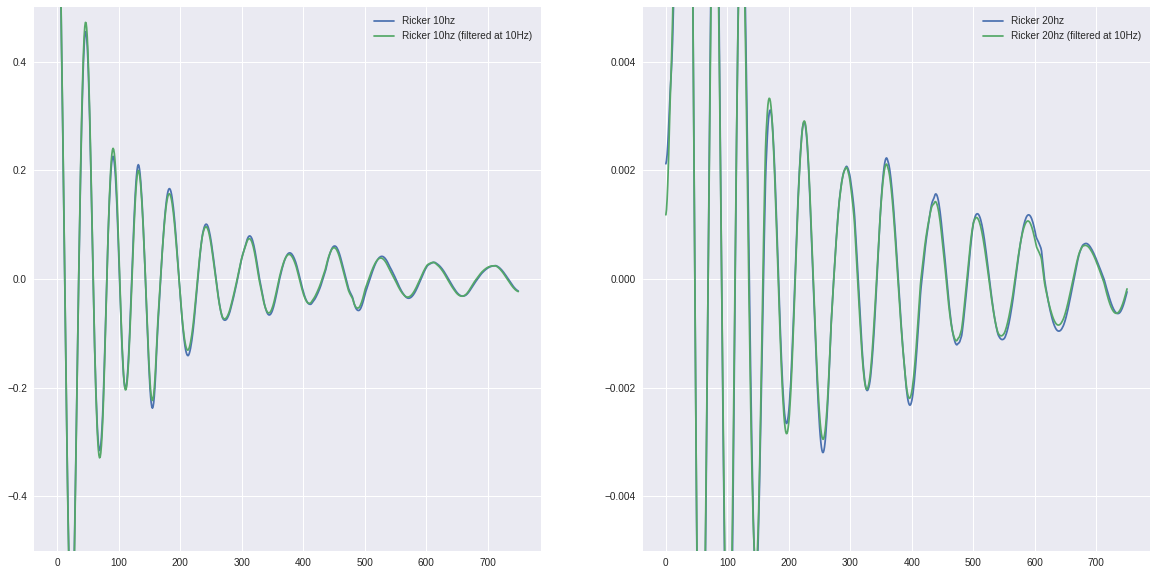

In [49]:
FIGSIZE = (20, 10)

i = 1000

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=FIGSIZE)

clip = 5e-1
axes[0].plot(dft0.real[i, :]/dft0.real[i, :].max(), label='Ricker 10hz')
axes[0].plot(gain * dft1.real[i, :]/dft1.real[i, :].max(), label='Ricker 10hz (filtered at 10Hz)')
axes[0].set_ylim(-clip, clip)
axes[0].legend()

coeff = 1
clip = 5e-3
axes[1].plot(dft2.real[i, :]/dft2.real[i, :].max(), label='Ricker 20hz')
axes[1].plot(gain * dft3.real[i, :]/dft3.real[i, :].max(), label='Ricker 20hz (filtered at 10Hz)')
axes[1].set_ylim(-clip, clip)
axes[1].legend()

## Questions

### Validation of DFTs

* Is it better to use a smooth version of the model?

### 3D implementation

* DFT of the entire volume?